## Trend filtering after spatial denoising

In [21]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
fish_path = os.path.abspath(os.path.join('..'))
if fish_path not in sys.path:
    sys.path.append(fish_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from trendFiltering.trendfilter import TF, TFsafe, TFsafeG

### Simulated data

In [23]:
xp = np.array([1, 100, 150, 260, 300, 350, 400], dtype='float64')
yp = np.array([3, 10, -2, -5, 9, 2, 6], dtype='float64')
x = np.linspace(1, 400, num=400)
spl = splrep(xp, yp)
y = splev(x, spl)
y = y + np.random.normal(size = y.shape)*5

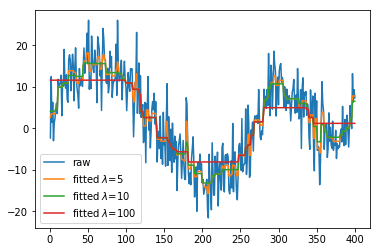

In [24]:
plt.plot(x, y, label='raw')
weights = np.ones(max(y.shape))
for lam in [5, 10, 100]:
    prob = TFsafe(y[:,np.newaxis],lam,order=1,mode = -1)
    prob.silence = True
    prob.pdas()
    plt.plot(x, prob.x, label='fitted $\lambda$=%d'%(lam))
plt.legend()
plt.show()

In [ ]:
x = np.linspace(1, 600, num=40000)
y = np.cos(x**2/10000*np.pi)
y = y + np.random.normal(size = y.shape)*0.45 * np.sqrt(400/40000)
prob = TFsafeG(y[:,np.newaxis],5*np.sqrt(40000/400),order=2,mode = -1)
prob.silence = False
prob.pdas()
plt.plot(x, y)
plt.plot(x, prob.x)

---------------------------------------------------
  IT       OBJ  #VIO     |VIO| |neg| |act| |pos|
---------------------------------------------------
   1  3.12e+08 26708  5.76e+06 13331 13438 13229
   2  1.17e+07 17951  1.69e+05  6441 27296  6261
   3  3.80e+06 14697  4.80e+04  7514 25015  7469
   4  1.59e+06 12532  1.92e+04  6585 26900  6513
   5  8.17e+05 11639  9.72e+03  5597 28524  5877
   6  4.98e+05 10812  5.90e+03  5452 29239  5307
   7  3.27e+05  9859  3.81e+03  5395 29867  4736
   8  2.24e+05  9504  2.76e+03  4911 30730  4357
   9  1.62e+05  8940  1.93e+03  4700 30958  4340
  10  1.24e+05  8458  1.50e+03  4520 31512  3966
  11  9.50e+04  7898  1.18e+03  4303 31984  3711
  12  7.75e+04  7775  9.96e+02  3860 32510  3628
  13  6.24e+04  7645  8.33e+02  3876 32599  3523
  14  5.55e+04  7256  7.63e+02  3758 32640  3600
  15  4.66e+04  6654  6.07e+02  3638 33034  3326
  16  3.86e+04  6980  5.90e+02  3320 33618  3060
  17  3.73e+04  6740  5.46e+02  3397 33310  3291
  18  3.22e+04

 165  2.12e+03  6884  2.09e+02   791 38575   632
 166  2.12e+03  6884  2.09e+02   791 38576   631
 167  2.11e+03  6883  2.09e+02   791 38577   630
 168  2.20e+03  6882  2.09e+02   791 38576   631
 169  2.14e+03  6882  2.09e+02   791 38575   632
 170  2.19e+03  6881  2.09e+02   791 38574   633
 171  2.25e+03  6880  2.09e+02   791 38575   632
 172  2.17e+03  6880  2.09e+02   791 38574   633
 173  2.11e+03  6879  2.09e+02   791 38575   632
 174  2.14e+03  6878  2.09e+02   791 38574   633
 175  2.21e+03  6877  2.09e+02   791 38575   632
 176  2.13e+03  6878  2.09e+02   791 38574   633
 177  2.09e+03  6878  2.09e+02   791 38573   634
 178  2.10e+03  6877  2.09e+02   791 38574   633
 179  2.11e+03  6876  2.09e+02   791 38575   632
 180  2.09e+03  6875  2.09e+02   791 38576   631
 181  2.09e+03  6875  2.09e+02   791 38575   632
 182  2.08e+03  6875  2.09e+02   791 38576   631
 183  2.07e+03  6874  2.09e+02   791 38577   630
 184  2.07e+03  6873  2.09e+02   791 38578   629
 185  2.10e+03  6872

 333  2.09e+03  6820  2.09e+02   789 38585   624
 334  2.08e+03  6819  2.09e+02   788 38586   624
 335  2.05e+03  6818  2.09e+02   789 38585   624
 336  2.08e+03  6817  2.09e+02   790 38584   624
 337  2.13e+03  6817  2.09e+02   789 38585   624
 338  2.08e+03  6817  2.09e+02   788 38586   624
 339  2.10e+03  6816  2.09e+02   787 38587   624
 340  2.07e+03  6822  2.09e+02   788 38586   624
 341  2.06e+03  6821  2.09e+02   788 38587   623
 342  2.06e+03  6820  2.09e+02   789 38586   623
 343  2.06e+03  6819  2.09e+02   790 38585   623
 344  2.06e+03  6819  2.09e+02   791 38584   623
 345  2.07e+03  6818  2.09e+02   790 38585   623
 346  2.08e+03  6818  2.09e+02   791 38584   623
 347  2.05e+03  6817  2.09e+02   790 38585   623
 348  2.03e+03  6817  2.09e+02   789 38586   623
 349  2.02e+03  6817  2.09e+02   788 38587   623
 350  2.08e+03  6817  2.09e+02   789 38586   623
 351  2.05e+03  6816  2.09e+02   788 38587   623
 352  2.06e+03  6816  2.09e+02   789 38586   623
 353  2.09e+03  6818

 501  2.01e+03  6797  2.08e+02   782 38591   625
 502  2.02e+03  6796  2.08e+02   782 38592   624
 503  2.04e+03  6797  2.08e+02   782 38591   625
 504  2.03e+03  6796  2.08e+02   783 38590   625
 505  2.02e+03  6796  2.08e+02   783 38591   624
 506  2.01e+03  6805  2.08e+02   783 38590   625
 507  2.00e+03  6805  2.08e+02   784 38589   625
 508  2.00e+03  6804  2.08e+02   783 38590   625
 509  2.00e+03  6803  2.08e+02   783 38591   624
 510  1.99e+03  6802  2.08e+02   783 38592   623
 511  1.99e+03  6801  2.08e+02   782 38593   623
 512  1.99e+03  6801  2.08e+02   783 38592   623
 513  1.99e+03  6800  2.08e+02   782 38593   623
 514  2.01e+03  6800  2.08e+02   782 38592   624
 515  1.99e+03  6799  2.08e+02   783 38591   624
 516  2.01e+03  6799  2.08e+02   783 38590   625
 517  1.99e+03  6798  2.08e+02   783 38591   624
 518  2.01e+03  6798  2.08e+02   783 38590   625
 519  2.00e+03  6797  2.08e+02   783 38591   624
 520  2.00e+03  6797  2.08e+02   783 38592   623
 521  1.99e+03  6797

 669  1.96e+03  6779  2.06e+02   781 38595   622
 670  1.97e+03  6778  2.05e+02   781 38596   621
 671  1.99e+03  6778  2.06e+02   781 38595   622
 672  1.97e+03  6777  2.05e+02   781 38596   621
 673  1.99e+03  6777  2.06e+02   781 38595   622
 674  1.96e+03  6776  2.05e+02   781 38596   621
 675  1.99e+03  6781  2.05e+02   781 38595   622
 676  1.99e+03  6780  2.05e+02   781 38594   623
 677  1.99e+03  6779  2.05e+02   781 38593   624
 678  1.99e+03  6777  2.05e+02   781 38592   625
 679  1.98e+03  6777  2.05e+02   781 38591   626
 680  1.99e+03  6778  2.05e+02   781 38590   627
 681  1.98e+03  6777  2.05e+02   781 38591   626
 682  1.99e+03  6777  2.05e+02   781 38592   625
 683  1.98e+03  6776  2.05e+02   781 38593   624
 684  2.00e+03  6778  2.05e+02   781 38592   625
 685  1.99e+03  6778  2.05e+02   781 38591   626
 686  2.00e+03  6777  2.05e+02   781 38592   625
 687  1.99e+03  6776  2.05e+02   781 38591   626
 688  2.00e+03  6775  2.05e+02   781 38592   625
 689  1.99e+03  6776

 837  1.99e+03  6757  2.05e+02   780 38593   625
 838  2.02e+03  6757  2.05e+02   780 38592   626
 839  2.03e+03  6756  2.05e+02   780 38593   625
 840  1.99e+03  6757  2.05e+02   780 38594   624
 841  1.98e+03  6755  2.05e+02   780 38595   623
 842  2.01e+03  6758  2.05e+02   780 38594   624
 843  2.01e+03  6758  2.05e+02   780 38593   625
 844  2.01e+03  6757  2.05e+02   780 38594   624
 845  2.01e+03  6756  2.05e+02   780 38593   625
 846  2.04e+03  6756  2.05e+02   780 38592   626
 847  2.05e+03  6755  2.05e+02   780 38593   625
 848  1.99e+03  6755  2.05e+02   780 38594   624
 849  1.98e+03  6754  2.05e+02   780 38595   623
 850  2.00e+03  6763  2.05e+02   780 38594   624
 851  1.99e+03  6762  2.05e+02   780 38593   625
 852  1.99e+03  6762  2.05e+02   780 38592   626
 853  1.99e+03  6761  2.05e+02   780 38593   625
 854  1.99e+03  6760  2.05e+02   780 38592   626
 855  1.99e+03  6760  2.05e+02   780 38591   627
 856  2.00e+03  6759  2.05e+02   780 38592   626
 857  1.99e+03  6758

1005  1.99e+03  6741  2.04e+02   781 38591   626
1006  1.98e+03  6741  2.04e+02   781 38590   627
1007  1.99e+03  6740  2.04e+02   781 38591   626
1008  1.99e+03  6745  2.04e+02   781 38590   627
1009  1.98e+03  6746  2.04e+02   780 38591   627
1010  1.98e+03  6745  2.04e+02   780 38592   626
1011  1.98e+03  6745  2.04e+02   780 38593   625
1012  1.98e+03  6744  2.04e+02   780 38592   626
1013  1.98e+03  6744  2.04e+02   780 38591   627
1014  1.98e+03  6743  2.04e+02   780 38592   626
1015  1.98e+03  6743  2.04e+02   780 38591   627
1016  1.98e+03  6742  2.04e+02   780 38590   628
1017  1.98e+03  6744  2.04e+02   780 38591   627
1018  1.97e+03  6742  2.04e+02   780 38592   626
1019  1.98e+03  6742  2.04e+02   780 38593   625
1020  1.97e+03  6741  2.04e+02   780 38592   626
1021  1.98e+03  6741  2.04e+02   780 38591   627
1022  1.98e+03  6741  2.04e+02   780 38592   626
1023  1.98e+03  6740  2.04e+02   780 38593   625
1024  1.99e+03  6746  2.04e+02   780 38592   626
1025  1.99e+03  6745

1173  1.99e+03  6728  2.03e+02   779 38591   628
1174  1.98e+03  6726  2.03e+02   779 38592   627
1175  1.99e+03  6725  2.03e+02   779 38591   628
1176  2.00e+03  6725  2.03e+02   779 38592   627
1177  1.99e+03  6724  2.03e+02   779 38593   626
1178  2.00e+03  6725  2.03e+02   779 38592   627
1179  2.00e+03  6724  2.03e+02   779 38591   628
1180  1.97e+03  6724  2.03e+02   779 38592   627
1181  1.97e+03  6724  2.03e+02   779 38593   626
1182  1.99e+03  6724  2.03e+02   779 38592   627
1183  2.00e+03  6723  2.03e+02   779 38593   626
1184  2.00e+03  6726  2.03e+02   779 38592   627
1185  1.99e+03  6724  2.03e+02   779 38591   628
1186  1.99e+03  6723  2.03e+02   779 38592   627
1187  1.99e+03  6725  2.03e+02   779 38593   626
1188  1.99e+03  6722  2.03e+02   779 38594   625
1189  2.00e+03  6722  2.03e+02   779 38593   626
1190  1.99e+03  6722  2.03e+02   779 38594   625
1191  2.00e+03  6722  2.03e+02   779 38593   626
1192  1.99e+03  6721  2.03e+02   779 38594   625
1193  2.00e+03  6728

1341  1.98e+03  6698  2.02e+02   779 38595   624
1342  1.98e+03  6697  2.02e+02   779 38596   623
1343  1.99e+03  6699  2.02e+02   779 38595   624
1344  1.98e+03  6699  2.02e+02   779 38594   625
1345  1.98e+03  6698  2.02e+02   779 38595   624
1346  1.99e+03  6697  2.02e+02   779 38594   625
1347  1.97e+03  6697  2.02e+02   779 38595   624
1348  1.96e+03  6696  2.02e+02   779 38596   623
1349  2.00e+03  6701  2.02e+02   779 38595   624
1350  1.99e+03  6700  2.02e+02   779 38594   625
1351  1.99e+03  6699  2.02e+02   779 38593   626
1352  1.98e+03  6697  2.02e+02   779 38592   627
1353  1.98e+03  6697  2.02e+02   779 38593   626
1354  1.98e+03  6696  2.02e+02   779 38594   625
1355  1.98e+03  6695  2.02e+02   779 38595   624
1356  2.00e+03  6696  2.02e+02   779 38594   625
1357  2.00e+03  6695  2.02e+02   779 38593   626
1358  2.00e+03  6695  2.02e+02   779 38594   625
1359  1.98e+03  6695  2.02e+02   779 38595   624
1360  1.97e+03  6694  2.02e+02   779 38596   623
1361  2.00e+03  6694

1509  1.99e+03  6674  2.01e+02   780 38591   627
1510  1.99e+03  6672  2.01e+02   780 38592   626
1511  2.00e+03  6672  2.01e+02   780 38591   627
1512  2.01e+03  6672  2.01e+02   780 38590   628
1513  2.03e+03  6671  2.01e+02   780 38591   627
1514  2.03e+03  6671  2.01e+02   780 38592   626
1515  2.02e+03  6671  2.01e+02   780 38591   627
1516  2.01e+03  6670  2.01e+02   780 38592   626
1517  2.01e+03  6671  2.01e+02   780 38591   627
1518  2.00e+03  6670  2.01e+02   780 38592   626
1519  2.00e+03  6669  2.01e+02   780 38593   625
1520  2.02e+03  6668  2.01e+02   780 38592   626
1521  2.01e+03  6668  2.01e+02   780 38593   625
1522  2.00e+03  6667  2.01e+02   780 38594   624
1523  2.01e+03  6668  2.01e+02   780 38593   625
1524  2.01e+03  6667  2.01e+02   780 38594   624
1525  1.99e+03  6667  2.01e+02   780 38595   623
1526  1.99e+03  6666  2.01e+02   780 38594   624
1527  1.99e+03  6668  2.01e+02   780 38593   625
1528  1.99e+03  6667  2.01e+02   780 38594   624
1529  1.98e+03  6667

1677  1.99e+03  6653  1.99e+02   780 38591   627
1678  2.00e+03  6653  1.99e+02   780 38592   626
1679  1.97e+03  6652  1.99e+02   780 38593   625
1680  2.01e+03  6657  1.99e+02   780 38592   626
1681  2.00e+03  6656  1.99e+02   780 38591   627
1682  2.01e+03  6656  2.00e+02   780 38590   628
1683  2.03e+03  6655  1.99e+02   780 38591   627
1684  2.03e+03  6655  2.00e+02   780 38590   628
1685  2.00e+03  6654  2.00e+02   780 38591   627
1686  2.01e+03  6653  2.00e+02   780 38590   628
1687  2.03e+03  6653  1.99e+02   780 38591   627
1688  1.97e+03  6654  1.99e+02   780 38592   626
1689  2.02e+03  6653  1.99e+02   780 38591   627
1690  2.01e+03  6653  1.99e+02   780 38592   626
1691  2.01e+03  6652  1.99e+02   780 38593   625
1692  2.00e+03  6662  1.99e+02   780 38592   626
1693  1.99e+03  6661  1.99e+02   780 38593   625
1694  1.98e+03  6661  1.99e+02   780 38592   626
1695  1.98e+03  6660  1.99e+02   780 38593   625
1696  1.98e+03  6660  1.99e+02   780 38592   626
1697  1.98e+03  6660

1845  1.99e+03  6643  1.98e+02   781 38589   628
1846  1.98e+03  6644  1.98e+02   781 38590   627
1847  1.98e+03  6642  1.98e+02   781 38589   628
1848  1.98e+03  6643  1.98e+02   781 38588   629
1849  1.98e+03  6642  1.98e+02   781 38589   628
1850  1.98e+03  6642  1.98e+02   781 38588   629
1851  1.98e+03  6642  1.98e+02   781 38587   630
1852  1.98e+03  6642  1.98e+02   781 38588   629
1853  1.97e+03  6641  1.98e+02   781 38589   628
1854  1.98e+03  6641  1.98e+02   781 38588   629
1855  1.98e+03  6640  1.98e+02   781 38589   628
1856  1.98e+03  6639  1.98e+02   781 38590   627
1857  1.98e+03  6638  1.98e+02   781 38589   628
1858  1.97e+03  6637  1.98e+02   781 38588   629
1859  1.98e+03  6637  1.98e+02   781 38589   628
1860  1.97e+03  6637  1.98e+02   781 38590   627
1861  1.98e+03  6636  1.98e+02   781 38591   626
1862  2.00e+03  6639  1.98e+02   781 38590   627
1863  1.99e+03  6638  1.98e+02   781 38589   628
1864  2.00e+03  6638  1.98e+02   781 38588   629
1865  1.99e+03  6637

2013  1.99e+03  6614  1.98e+02   780 38591   627
2014  1.98e+03  6614  1.98e+02   780 38590   628
2015  1.98e+03  6613  1.98e+02   780 38591   627
2016  2.00e+03  6612  1.98e+02   780 38590   628
2017  1.97e+03  6612  1.98e+02   780 38591   627
2018  1.98e+03  6611  1.98e+02   780 38592   626
2019  1.99e+03  6615  1.98e+02   780 38591   627
2020  1.99e+03  6615  1.98e+02   780 38590   628
2021  1.98e+03  6614  1.98e+02   780 38591   627
2022  1.98e+03  6614  1.98e+02   780 38590   628
2023  1.98e+03  6613  1.98e+02   780 38589   629
2024  2.03e+03  6612  1.98e+02   780 38588   630
2025  2.01e+03  6611  1.98e+02   780 38589   629
2026  1.96e+03  6613  1.98e+02   780 38590   628
2027  2.01e+03  6611  1.98e+02   780 38591   627
2028  1.97e+03  6610  1.98e+02   780 38592   626
2029  1.99e+03  6610  1.98e+02   780 38591   627
2030  1.99e+03  6609  1.98e+02   780 38592   626
2031  2.00e+03  6609  1.98e+02   780 38591   627
2032  2.00e+03  6609  1.98e+02   780 38592   626
2033  1.98e+03  6608

2181  1.97e+03  6588  1.97e+02   780 38589   629
2182  1.97e+03  6587  1.97e+02   780 38590   628
2183  1.99e+03  6598  1.97e+02   780 38589   629
2184  1.98e+03  6597  1.97e+02   779 38590   629
2185  1.98e+03  6596  1.97e+02   779 38589   630
2186  1.98e+03  6596  1.97e+02   779 38588   631
2187  1.98e+03  6595  1.97e+02   779 38589   630
2188  1.98e+03  6594  1.97e+02   779 38588   631
2189  1.99e+03  6595  1.97e+02   779 38587   632
2190  2.00e+03  6594  1.97e+02   779 38586   633
2191  2.01e+03  6594  1.97e+02   779 38587   632
2192  1.99e+03  6593  1.97e+02   779 38588   631
2193  2.00e+03  6593  1.97e+02   779 38587   632
2194  2.00e+03  6592  1.97e+02   779 38588   631
2195  1.97e+03  6593  1.97e+02   779 38587   632
2196  1.97e+03  6592  1.97e+02   779 38588   631
2197  1.98e+03  6591  1.97e+02   779 38589   630
2198  1.97e+03  6590  1.97e+02   779 38588   631
2199  1.98e+03  6590  1.97e+02   779 38587   632
2200  1.97e+03  6589  1.97e+02   779 38588   631
2201  1.99e+03  6590

2349  1.98e+03  6568  1.95e+02   781 38587   630
2350  1.98e+03  6568  1.95e+02   781 38586   631
2351  1.98e+03  6568  1.95e+02   781 38587   630
2352  1.98e+03  6567  1.95e+02   781 38586   631
2353  2.03e+03  6566  1.95e+02   781 38585   632
2354  1.97e+03  6567  1.95e+02   781 38586   631
2355  1.97e+03  6566  1.95e+02   781 38587   630
2356  1.97e+03  6565  1.95e+02   781 38586   631
2357  1.97e+03  6565  1.95e+02   781 38587   630
2358  1.97e+03  6565  1.95e+02   781 38588   629
2359  1.97e+03  6564  1.95e+02   781 38589   628
2360  1.99e+03  6566  1.95e+02   781 38588   629
2361  1.98e+03  6564  1.95e+02   781 38587   630
2362  1.96e+03  6564  1.95e+02   781 38588   629
2363  1.95e+03  6563  1.95e+02   781 38589   628
2364  1.98e+03  6563  1.95e+02   781 38588   629
2365  1.96e+03  6562  1.95e+02   781 38589   628
2366  1.98e+03  6572  1.95e+02   781 38588   629
2367  1.98e+03  6572  1.95e+02   781 38587   630
2368  1.98e+03  6572  1.95e+02   781 38586   631
2369  1.98e+03  6571

2517  1.98e+03  6545  1.94e+02   781 38583   634
2518  1.98e+03  6544  1.94e+02   781 38584   633
2519  1.98e+03  6543  1.94e+02   781 38583   634
2520  1.99e+03  6543  1.94e+02   781 38582   635
2521  1.99e+03  6542  1.94e+02   781 38583   634
2522  1.98e+03  6543  1.94e+02   781 38584   633
2523  1.97e+03  6543  1.94e+02   781 38585   632
2524  1.98e+03  6543  1.94e+02   781 38584   633
2525  1.96e+03  6542  1.94e+02   781 38585   632
2526  1.98e+03  6541  1.94e+02   781 38586   631
2527  1.98e+03  6541  1.94e+02   781 38585   632
2528  1.97e+03  6541  1.94e+02   781 38584   633
2529  1.97e+03  6540  1.94e+02   781 38585   632
2530  2.00e+03  6540  1.94e+02   781 38584   633
2531  1.98e+03  6539  1.94e+02   781 38585   632
2532  1.98e+03  6539  1.94e+02   781 38584   633
2533  1.98e+03  6538  1.94e+02   781 38585   632
2534  1.99e+03  6547  1.94e+02   781 38584   633
2535  1.98e+03  6546  1.94e+02   781 38585   632
2536  2.00e+03  6546  1.94e+02   781 38584   633
2537  1.99e+03  6545

2685  1.99e+03  6518  1.93e+02   782 38587   629
2686  1.98e+03  6517  1.93e+02   782 38586   630
2687  1.99e+03  6517  1.93e+02   782 38587   629
2688  1.97e+03  6517  1.93e+02   782 38588   628
2689  1.99e+03  6516  1.93e+02   782 38587   629
2690  1.98e+03  6523  1.93e+02   782 38586   630
2691  1.97e+03  6522  1.93e+02   782 38587   629
2692  1.97e+03  6521  1.93e+02   782 38586   630
2693  1.98e+03  6521  1.93e+02   782 38585   631
2694  1.97e+03  6520  1.93e+02   782 38586   630
2695  1.98e+03  6521  1.93e+02   782 38585   631
2696  1.98e+03  6520  1.93e+02   782 38584   632
2697  1.98e+03  6520  1.93e+02   782 38585   631
2698  1.97e+03  6519  1.93e+02   782 38586   630
2699  1.98e+03  6519  1.93e+02   782 38585   631
2700  1.98e+03  6518  1.93e+02   782 38586   630
2701  2.01e+03  6519  1.93e+02   782 38585   631
2702  1.98e+03  6518  1.93e+02   782 38584   632
2703  1.98e+03  6517  1.93e+02   782 38585   631
2704  1.98e+03  6517  1.93e+02   782 38586   630
2705  1.98e+03  6516

2853  1.97e+03  6498  1.92e+02   782 38583   633
2854  1.98e+03  6501  1.92e+02   782 38582   634
2855  1.97e+03  6501  1.92e+02   782 38581   635
2856  1.97e+03  6500  1.92e+02   782 38582   634
2857  1.97e+03  6498  1.92e+02   782 38581   635
2858  1.98e+03  6497  1.92e+02   782 38582   634
2859  1.97e+03  6497  1.92e+02   782 38581   635
2860  1.97e+03  6496  1.92e+02   782 38582   634
2861  1.99e+03  6497  1.92e+02   782 38581   635
2862  1.99e+03  6496  1.92e+02   782 38580   636
2863  1.98e+03  6497  1.92e+02   782 38581   635
2864  1.98e+03  6496  1.92e+02   782 38582   634
2865  1.98e+03  6495  1.92e+02   782 38583   633
2866  1.98e+03  6497  1.92e+02   782 38582   634
2867  1.98e+03  6495  1.92e+02   782 38581   635
2868  1.99e+03  6495  1.92e+02   782 38580   636
2869  1.97e+03  6495  1.92e+02   782 38581   635
2870  1.98e+03  6494  1.92e+02   782 38582   634
2871  1.98e+03  6495  1.92e+02   782 38583   633
2872  1.96e+03  6494  1.92e+02   782 38582   634
2873  1.97e+03  6493

3021  1.92e+03  6453  1.91e+02   762 38613   623
3022  1.92e+03  6452  1.91e+02   762 38614   622
3023  1.91e+03  6453  1.91e+02   762 38613   623
3024  1.91e+03  6452  1.91e+02   762 38614   622
3025  1.91e+03  6450  1.91e+02   762 38613   623
3026  1.91e+03  6451  1.91e+02   762 38612   624
3027  1.90e+03  6449  1.91e+02   762 38613   623
3028  1.94e+03  6449  1.91e+02   762 38612   624
3029  1.91e+03  6448  1.91e+02   762 38613   623
3030  1.92e+03  6447  1.91e+02   762 38612   624
3031  1.91e+03  6447  1.91e+02   762 38613   623
3032  1.91e+03  6446  1.91e+02   762 38614   622
3033  1.91e+03  6444  1.91e+02   763 38613   622
3034  1.91e+03  6443  1.91e+02   762 38614   622
3035  1.91e+03  6443  1.91e+02   763 38613   622
3036  1.91e+03  6442  1.91e+02   762 38614   622
3037  1.91e+03  6442  1.91e+02   763 38613   622
3038  1.91e+03  6441  1.91e+02   762 38614   622
3039  1.91e+03  6440  1.91e+02   763 38613   622
3040  1.91e+03  6439  1.91e+02   762 38614   622
3041  1.90e+03  6438

3189  1.90e+03  6405  1.89e+02   758 38623   617
3190  1.89e+03  6404  1.89e+02   758 38622   618
3191  1.89e+03  6403  1.89e+02   758 38621   619
3192  1.90e+03  6403  1.89e+02   758 38620   620
3193  1.89e+03  6402  1.89e+02   758 38621   619
3194  1.89e+03  6401  1.89e+02   758 38622   618
3195  1.88e+03  6400  1.89e+02   758 38623   617
3196  1.90e+03  6403  1.89e+02   758 38622   618
3197  1.90e+03  6402  1.89e+02   758 38623   617
3198  1.89e+03  6402  1.89e+02   758 38622   618
3199  1.89e+03  6401  1.89e+02   758 38623   617
3200  1.90e+03  6400  1.89e+02   758 38622   618
3201  1.90e+03  6400  1.89e+02   758 38623   617
3202  1.89e+03  6399  1.88e+02   758 38624   616
3203  1.89e+03  6400  1.88e+02   758 38623   617
3204  1.88e+03  6400  1.88e+02   758 38624   616
3205  1.89e+03  6401  1.89e+02   758 38623   617
3206  1.89e+03  6400  1.89e+02   758 38624   616
3207  1.90e+03  6399  1.89e+02   758 38623   617
3208  1.88e+03  6399  1.88e+02   758 38624   616
3209  1.87e+03  6399

3357  1.90e+03  6385  1.87e+02   758 38621   619
3358  1.90e+03  6384  1.87e+02   758 38620   620
3359  1.89e+03  6383  1.87e+02   758 38619   621
3360  1.90e+03  6383  1.87e+02   758 38618   622
3361  1.89e+03  6382  1.87e+02   758 38619   621
3362  1.91e+03  6382  1.87e+02   758 38618   622
3363  1.91e+03  6381  1.87e+02   758 38619   621
3364  1.90e+03  6381  1.87e+02   758 38620   620
3365  1.87e+03  6381  1.87e+02   758 38621   619
3366  1.87e+03  6380  1.87e+02   758 38622   618
3367  1.89e+03  6380  1.87e+02   758 38621   619
3368  1.88e+03  6379  1.87e+02   758 38620   620
3369  1.89e+03  6378  1.87e+02   758 38619   621
3370  1.86e+03  6378  1.87e+02   758 38620   620
3371  1.88e+03  6377  1.87e+02   758 38621   619
3372  1.88e+03  6378  1.87e+02   758 38622   618
3373  1.87e+03  6376  1.87e+02   758 38621   619
3374  1.89e+03  6377  1.87e+02   758 38620   620
3375  1.89e+03  6376  1.87e+02   758 38621   619
3376  1.86e+03  6377  1.87e+02   758 38622   618
3377  1.87e+03  6376

3525  1.87e+03  6355  1.86e+02   756 38619   623
3526  1.90e+03  6356  1.86e+02   756 38618   624
3527  1.89e+03  6355  1.86e+02   756 38617   625
3528  1.89e+03  6355  1.86e+02   756 38618   624
3529  1.88e+03  6354  1.86e+02   756 38619   623
3530  1.87e+03  6354  1.86e+02   756 38620   622
3531  1.86e+03  6353  1.86e+02   756 38621   621
3532  1.88e+03  6354  1.86e+02   756 38620   622
3533  1.87e+03  6353  1.86e+02   756 38619   623
3534  1.87e+03  6352  1.86e+02   756 38620   622
3535  1.87e+03  6352  1.86e+02   756 38619   623
3536  1.88e+03  6352  1.86e+02   756 38620   622
3537  1.87e+03  6351  1.86e+02   756 38621   621
3538  1.88e+03  6356  1.86e+02   756 38620   622
3539  1.90e+03  6356  1.86e+02   756 38619   623
3540  1.89e+03  6355  1.86e+02   756 38620   622
3541  1.90e+03  6355  1.86e+02   756 38619   623
3542  1.92e+03  6353  1.86e+02   756 38618   624
3543  1.90e+03  6353  1.86e+02   756 38619   623
3544  1.92e+03  6353  1.86e+02   756 38618   624
3545  1.88e+03  6352

3693  1.88e+03  6311  1.86e+02   756 38619   623
3694  1.89e+03  6311  1.86e+02   756 38620   622
3695  1.87e+03  6311  1.85e+02   756 38621   621
3696  1.89e+03  6311  1.85e+02   756 38620   622
3697  1.87e+03  6310  1.85e+02   756 38621   621
3698  1.88e+03  6310  1.86e+02   756 38620   622
3699  1.88e+03  6309  1.85e+02   756 38621   621
3700  1.88e+03  6313  1.86e+02   756 38620   622
3701  1.90e+03  6310  1.86e+02   756 38619   623
3702  1.89e+03  6309  1.86e+02   756 38618   624
3703  1.90e+03  6309  1.86e+02   756 38619   623
3704  1.88e+03  6308  1.85e+02   756 38620   622
3705  1.87e+03  6312  1.86e+02   756 38619   623
3706  1.87e+03  6311  1.86e+02   756 38618   624
3707  1.87e+03  6312  1.86e+02   756 38617   625
3708  1.88e+03  6312  1.86e+02   756 38618   624
3709  1.87e+03  6312  1.86e+02   756 38619   623
3710  1.89e+03  6312  1.86e+02   756 38618   624
3711  1.88e+03  6311  1.86e+02   756 38617   625
3712  1.90e+03  6311  1.86e+02   756 38616   626
3713  1.90e+03  6311

3861  1.88e+03  6277  1.85e+02   756 38617   625
3862  1.88e+03  6276  1.85e+02   756 38618   624
3863  1.88e+03  6275  1.85e+02   756 38617   625
3864  1.88e+03  6276  1.85e+02   756 38618   624
3865  1.87e+03  6275  1.85e+02   756 38617   625
3866  1.87e+03  6276  1.85e+02   756 38618   624
3867  1.87e+03  6275  1.85e+02   756 38619   623
3868  1.87e+03  6274  1.85e+02   756 38620   622
3869  1.90e+03  6277  1.85e+02   756 38619   623
3870  1.90e+03  6276  1.85e+02   756 38618   624
3871  1.90e+03  6275  1.85e+02   756 38617   625
3872  1.89e+03  6274  1.85e+02   756 38618   624
3873  1.86e+03  6276  1.85e+02   756 38619   623
3874  1.86e+03  6275  1.85e+02   756 38618   624
3875  1.86e+03  6274  1.85e+02   756 38619   623
3876  1.88e+03  6276  1.85e+02   756 38618   624
3877  1.89e+03  6275  1.85e+02   756 38617   625
3878  1.88e+03  6274  1.85e+02   756 38618   624
3879  1.87e+03  6274  1.85e+02   756 38619   623
3880  1.87e+03  6273  1.85e+02   756 38620   622
3881  1.88e+03  6273

4029  1.89e+03  6245  1.84e+02   756 38629   613
4030  1.87e+03  6244  1.84e+02   755 38630   613
4031  1.89e+03  6244  1.84e+02   756 38629   613
4032  1.87e+03  6243  1.84e+02   755 38630   613
4033  1.89e+03  6246  1.84e+02   756 38629   613
4034  1.88e+03  6245  1.84e+02   756 38628   614
4035  1.88e+03  6244  1.84e+02   756 38629   613
4036  1.89e+03  6243  1.84e+02   757 38628   613
4037  1.86e+03  6243  1.84e+02   756 38629   613
4038  1.87e+03  6242  1.84e+02   755 38630   613
4039  1.90e+03  6245  1.84e+02   756 38629   613
4040  1.90e+03  6244  1.84e+02   757 38628   613
4041  1.91e+03  6243  1.84e+02   758 38627   613
4042  1.90e+03  6242  1.84e+02   757 38628   613
4043  1.87e+03  6242  1.84e+02   756 38629   613
4044  1.87e+03  6242  1.83e+02   755 38630   613
4045  1.86e+03  6241  1.83e+02   755 38629   614
4046  1.89e+03  6243  1.83e+02   756 38628   614
4047  1.88e+03  6242  1.83e+02   756 38629   613
4048  1.88e+03  6242  1.83e+02   756 38628   614
4049  1.88e+03  6241

4197  1.88e+03  6224  1.81e+02   757 38629   612
4198  1.88e+03  6223  1.81e+02   757 38630   611
4199  1.88e+03  6222  1.81e+02   758 38629   611
4200  1.87e+03  6221  1.81e+02   759 38628   611
4201  1.89e+03  6221  1.81e+02   760 38627   611
4202  1.87e+03  6220  1.81e+02   759 38628   611
4203  1.87e+03  6220  1.81e+02   758 38629   611
4204  1.85e+03  6220  1.81e+02   757 38630   611
4205  1.85e+03  6220  1.81e+02   756 38631   611
4206  1.85e+03  6219  1.81e+02   756 38630   612
4207  1.88e+03  6225  1.81e+02   757 38629   612
4208  1.87e+03  6224  1.81e+02   756 38630   612
4209  1.88e+03  6223  1.81e+02   757 38629   612
4210  1.88e+03  6222  1.81e+02   758 38628   612
4211  1.88e+03  6221  1.81e+02   757 38629   612
4212  1.88e+03  6220  1.81e+02   758 38628   612
4213  1.87e+03  6219  1.81e+02   757 38629   612
4214  1.87e+03  6219  1.81e+02   756 38630   612
4215  1.86e+03  6219  1.81e+02   755 38631   612
4216  1.87e+03  6219  1.81e+02   756 38630   612
4217  1.85e+03  6218

4365  1.88e+03  6206  1.80e+02   759 38629   610
4366  1.89e+03  6205  1.80e+02   760 38628   610
4367  1.89e+03  6206  1.80e+02   759 38629   610
4368  1.88e+03  6205  1.80e+02   758 38630   610
4369  1.86e+03  6207  1.80e+02   757 38631   610
4370  1.85e+03  6206  1.80e+02   758 38630   610
4371  1.85e+03  6206  1.80e+02   759 38629   610
4372  1.85e+03  6205  1.80e+02   758 38630   610
4373  1.85e+03  6205  1.80e+02   757 38631   610
4374  1.85e+03  6204  1.80e+02   758 38630   610
4375  1.88e+03  6213  1.80e+02   759 38629   610
4376  1.88e+03  6212  1.80e+02   760 38628   610
4377  1.88e+03  6212  1.80e+02   759 38629   610
4378  1.88e+03  6210  1.80e+02   760 38628   610
4379  1.87e+03  6211  1.80e+02   761 38627   610
4380  1.87e+03  6210  1.80e+02   760 38628   610
4381  1.89e+03  6210  1.80e+02   761 38627   610
4382  1.89e+03  6209  1.80e+02   760 38628   610
4383  1.87e+03  6207  1.80e+02   759 38629   610
4384  1.87e+03  6208  1.80e+02   760 38628   610
4385  1.87e+03  6207

4533  1.86e+03  6185  1.79e+02   760 38629   609
4534  1.87e+03  6184  1.79e+02   759 38630   609
4535  1.87e+03  6185  1.79e+02   760 38629   609
4536  1.86e+03  6184  1.79e+02   761 38628   609
4537  1.87e+03  6184  1.79e+02   760 38629   609
4538  1.86e+03  6183  1.79e+02   759 38630   609
4539  1.87e+03  6188  1.79e+02   760 38629   609
4540  1.86e+03  6187  1.79e+02   759 38630   609
4541  1.86e+03  6186  1.79e+02   758 38631   609
4542  1.86e+03  6185  1.79e+02   759 38630   609
4543  1.87e+03  6185  1.79e+02   760 38629   609
4544  1.87e+03  6185  1.79e+02   759 38630   609
4545  1.88e+03  6184  1.79e+02   760 38629   609
4546  1.88e+03  6184  1.79e+02   761 38628   609
4547  1.86e+03  6183  1.79e+02   760 38629   609
4548  1.88e+03  6183  1.79e+02   761 38628   609
4549  1.87e+03  6182  1.79e+02   762 38627   609
4550  1.86e+03  6182  1.79e+02   761 38628   609
4551  1.87e+03  6181  1.79e+02   760 38629   609
4552  1.89e+03  6182  1.79e+02   761 38628   609
4553  1.88e+03  6181

4701  1.88e+03  6160  1.78e+02   760 38629   609
4702  1.87e+03  6158  1.78e+02   759 38630   609
4703  1.87e+03  6157  1.78e+02   758 38631   609
4704  1.87e+03  6157  1.78e+02   759 38630   609
4705  1.86e+03  6157  1.78e+02   758 38631   609
4706  1.86e+03  6156  1.78e+02   759 38630   609
4707  1.87e+03  6157  1.78e+02   760 38629   609
4708  1.86e+03  6156  1.78e+02   761 38628   609
4709  1.86e+03  6156  1.78e+02   760 38629   609
4710  1.86e+03  6155  1.78e+02   759 38630   609
4711  1.86e+03  6155  1.78e+02   760 38629   609
4712  1.86e+03  6155  1.78e+02   759 38630   609
4713  1.86e+03  6154  1.78e+02   760 38629   609
4714  1.87e+03  6154  1.78e+02   759 38630   609
4715  1.86e+03  6154  1.78e+02   760 38629   609
4716  1.87e+03  6153  1.78e+02   759 38630   609
4717  1.88e+03  6154  1.78e+02   760 38629   609
4718  1.88e+03  6153  1.78e+02   759 38630   609
4719  1.86e+03  6152  1.78e+02   758 38631   609
4720  1.88e+03  6162  1.78e+02   759 38630   609
4721  1.87e+03  6161

4869  1.86e+03  6134  1.76e+02   759 38633   606
4870  1.86e+03  6133  1.76e+02   760 38632   606
4871  1.84e+03  6134  1.76e+02   759 38633   606
4872  1.85e+03  6133  1.76e+02   758 38634   606
4873  1.85e+03  6132  1.76e+02   757 38635   606
4874  1.87e+03  6133  1.76e+02   758 38634   606
4875  1.87e+03  6132  1.76e+02   759 38633   606
4876  1.85e+03  6131  1.76e+02   758 38634   606
4877  1.87e+03  6131  1.76e+02   759 38633   606
4878  1.86e+03  6130  1.76e+02   758 38634   606
4879  1.88e+03  6133  1.76e+02   759 38633   606
4880  1.88e+03  6132  1.76e+02   758 38634   606
4881  1.89e+03  6131  1.76e+02   759 38633   606
4882  1.91e+03  6131  1.76e+02   760 38632   606
4883  1.89e+03  6130  1.76e+02   759 38633   606
4884  1.88e+03  6130  1.76e+02   760 38632   606
4885  1.89e+03  6129  1.76e+02   759 38633   606
4886  1.87e+03  6130  1.76e+02   758 38634   606
4887  1.87e+03  6129  1.76e+02   759 38633   606
4888  1.84e+03  6129  1.76e+02   758 38634   606
4889  1.86e+03  6128

5037  1.87e+03  6116  1.75e+02   761 38633   604
5038  1.87e+03  6115  1.75e+02   762 38632   604
5039  1.87e+03  6114  1.75e+02   761 38633   604
5040  1.87e+03  6113  1.75e+02   760 38634   604
5041  1.87e+03  6119  1.74e+02   761 38633   604
5042  1.86e+03  6117  1.74e+02   760 38634   604
5043  1.86e+03  6116  1.74e+02   761 38633   604
5044  1.86e+03  6116  1.74e+02   762 38632   604
5045  1.86e+03  6115  1.74e+02   761 38633   604
5046  1.86e+03  6115  1.74e+02   760 38634   604
5047  1.85e+03  6114  1.74e+02   759 38635   604
5048  1.87e+03  6114  1.74e+02   760 38634   604
5049  1.86e+03  6113  1.74e+02   759 38635   604
5050  1.87e+03  6116  1.75e+02   760 38634   604
5051  1.87e+03  6115  1.75e+02   761 38633   604
5052  1.86e+03  6115  1.75e+02   762 38632   604
5053  1.86e+03  6114  1.75e+02   761 38633   604
5054  1.87e+03  6114  1.75e+02   762 38632   604
5055  1.86e+03  6113  1.75e+02   761 38633   604
5056  1.86e+03  6113  1.74e+02   760 38634   604
5057  1.86e+03  6114

5205  1.86e+03  6073  1.73e+02   760 38631   607
5206  1.86e+03  6072  1.73e+02   760 38632   606
5207  1.85e+03  6072  1.74e+02   760 38631   607
5208  1.87e+03  6071  1.73e+02   760 38632   606
5209  1.87e+03  6070  1.73e+02   760 38631   607
5210  1.86e+03  6070  1.73e+02   760 38630   608
5211  1.87e+03  6069  1.73e+02   760 38631   607
5212  1.86e+03  6069  1.73e+02   760 38632   606
5213  1.86e+03  6068  1.73e+02   760 38633   605
5214  1.85e+03  6067  1.73e+02   759 38634   605
5215  1.86e+03  6067  1.73e+02   760 38633   605
5216  1.86e+03  6067  1.73e+02   761 38632   605
5217  1.87e+03  6066  1.73e+02   760 38633   605
5218  1.86e+03  6065  1.73e+02   759 38634   605
5219  1.86e+03  6064  1.73e+02   760 38633   605
5220  1.88e+03  6066  1.74e+02   761 38632   605
5221  1.88e+03  6065  1.74e+02   761 38633   604
5222  1.88e+03  6065  1.74e+02   762 38632   604
5223  1.87e+03  6064  1.74e+02   761 38633   604
5224  1.86e+03  6063  1.73e+02   760 38634   604
5225  1.87e+03  6063

5373  1.84e+03  6028  1.72e+02   758 38631   609
5374  1.86e+03  6028  1.72e+02   758 38632   608
5375  1.84e+03  6027  1.72e+02   758 38633   607
5376  1.85e+03  6027  1.72e+02   758 38632   608
5377  1.85e+03  6028  1.72e+02   758 38631   609
5378  1.84e+03  6027  1.72e+02   758 38630   610
5379  1.85e+03  6027  1.72e+02   758 38631   609
5380  1.84e+03  6026  1.72e+02   758 38632   608
5381  1.85e+03  6026  1.72e+02   758 38633   607
5382  1.85e+03  6025  1.72e+02   758 38634   606
5383  1.86e+03  6025  1.72e+02   758 38633   607
5384  1.85e+03  6024  1.72e+02   758 38634   606
5385  1.87e+03  6025  1.72e+02   758 38633   607
5386  1.87e+03  6024  1.72e+02   758 38632   608
5387  1.87e+03  6024  1.72e+02   758 38633   607
5388  1.86e+03  6024  1.72e+02   758 38634   606
5389  1.84e+03  6023  1.72e+02   758 38635   605
5390  1.85e+03  6032  1.72e+02   758 38634   606
5391  1.85e+03  6031  1.72e+02   758 38633   607
5392  1.85e+03  6030  1.72e+02   758 38632   608
5393  1.86e+03  6029

5541  1.84e+03  6014  1.71e+02   758 38633   607
5542  1.84e+03  6013  1.71e+02   758 38632   608
5543  1.86e+03  6015  1.71e+02   758 38631   609
5544  1.87e+03  6013  1.71e+02   758 38632   608
5545  1.85e+03  6015  1.71e+02   758 38633   607
5546  1.84e+03  6013  1.71e+02   758 38632   608
5547  1.84e+03  6012  1.71e+02   758 38633   607
5548  1.86e+03  6013  1.71e+02   758 38632   608
5549  1.86e+03  6012  1.71e+02   758 38633   607
5550  1.86e+03  6013  1.71e+02   758 38634   606
5551  1.85e+03  6011  1.71e+02   759 38633   606
5552  1.85e+03  6020  1.71e+02   759 38632   607
5553  1.84e+03  6019  1.71e+02   758 38633   607
5554  1.84e+03  6018  1.71e+02   758 38634   606
5555  1.84e+03  6018  1.71e+02   758 38633   607
5556  1.84e+03  6018  1.71e+02   758 38632   608
5557  1.84e+03  6018  1.71e+02   758 38633   607
5558  1.84e+03  6018  1.71e+02   758 38632   608
5559  1.83e+03  6017  1.71e+02   758 38633   607
5560  1.83e+03  6017  1.71e+02   758 38632   608
5561  1.83e+03  6016

5709  1.84e+03  5977  1.70e+02   759 38639   600
5710  1.84e+03  5975  1.70e+02   759 38638   601
5711  1.86e+03  5975  1.70e+02   759 38637   602
5712  1.85e+03  5974  1.70e+02   759 38638   601
5713  1.82e+03  5974  1.70e+02   759 38639   600
5714  1.82e+03  5973  1.70e+02   759 38640   599
5715  1.84e+03  5974  1.70e+02   759 38639   600
5716  1.85e+03  5973  1.70e+02   759 38638   601
5717  1.83e+03  5973  1.70e+02   759 38639   600
5718  1.82e+03  5972  1.70e+02   759 38640   599
5719  1.88e+03  5977  1.70e+02   759 38639   600
5720  1.89e+03  5976  1.70e+02   759 38638   601
5721  1.85e+03  5974  1.70e+02   759 38637   602
5722  1.86e+03  5972  1.70e+02   759 38638   601
5723  1.85e+03  5972  1.70e+02   759 38639   600
5724  1.84e+03  5971  1.70e+02   759 38640   599
5725  1.86e+03  5976  1.70e+02   759 38639   600
5726  1.85e+03  5976  1.70e+02   759 38638   601
5727  1.86e+03  5975  1.70e+02   759 38637   602
5728  1.87e+03  5973  1.70e+02   759 38638   601
5729  1.84e+03  5972

5877  1.82e+03  5923  1.69e+02   733 38665   600
5878  1.82e+03  5929  1.69e+02   734 38664   600
5879  1.81e+03  5928  1.69e+02   734 38665   599
5880  1.81e+03  5927  1.69e+02   733 38666   599
5881  1.81e+03  5926  1.69e+02   732 38667   599
5882  1.81e+03  5925  1.69e+02   733 38666   599
5883  1.83e+03  5924  1.69e+02   734 38665   599
5884  1.82e+03  5923  1.69e+02   733 38666   599
5885  1.79e+03  5923  1.69e+02   732 38667   599
5886  1.79e+03  5922  1.69e+02   731 38668   599
5887  1.82e+03  5923  1.69e+02   732 38667   599
5888  1.82e+03  5922  1.69e+02   733 38666   599
5889  1.80e+03  5922  1.69e+02   732 38667   599
5890  1.79e+03  5921  1.69e+02   731 38668   599
5891  1.81e+03  5922  1.69e+02   732 38667   599
5892  1.82e+03  5921  1.69e+02   733 38666   599
5893  1.81e+03  5920  1.69e+02   732 38667   599
5894  1.82e+03  5921  1.69e+02   733 38666   599
5895  1.82e+03  5920  1.69e+02   732 38667   599
5896  1.81e+03  5919  1.69e+02   731 38668   599
5897  1.82e+03  5919

6045  1.82e+03  5884  1.69e+02   736 38665   597
6046  1.83e+03  5883  1.69e+02   735 38666   597
6047  1.82e+03  5890  1.69e+02   736 38665   597
6048  1.81e+03  5889  1.69e+02   737 38664   597
6049  1.82e+03  5888  1.69e+02   738 38663   597
6050  1.82e+03  5888  1.69e+02   739 38662   597
6051  1.82e+03  5887  1.69e+02   738 38663   597
6052  1.82e+03  5887  1.69e+02   739 38662   597
6053  1.83e+03  5886  1.69e+02   738 38663   597
6054  1.84e+03  5885  1.69e+02   739 38662   597
6055  1.83e+03  5885  1.69e+02   740 38661   597
6056  1.83e+03  5885  1.69e+02   739 38662   597
6057  1.83e+03  5884  1.69e+02   738 38663   597
6058  1.81e+03  5884  1.69e+02   737 38664   597
6059  1.80e+03  5883  1.68e+02   736 38665   597
6060  1.82e+03  5892  1.69e+02   737 38664   597
6061  1.82e+03  5891  1.69e+02   736 38665   597
6062  1.82e+03  5890  1.69e+02   735 38666   597
6063  1.82e+03  5889  1.69e+02   736 38665   597
6064  1.86e+03  5889  1.69e+02   737 38664   597
6065  1.80e+03  5890

6213  1.83e+03  5860  1.68e+02   736 38665   597
6214  1.82e+03  5862  1.68e+02   737 38664   597
6215  1.82e+03  5861  1.68e+02   737 38663   598
6216  1.82e+03  5861  1.68e+02   738 38662   598
6217  1.82e+03  5860  1.68e+02   737 38663   598
6218  1.82e+03  5860  1.68e+02   738 38662   598
6219  1.82e+03  5859  1.68e+02   737 38663   598
6220  1.82e+03  5858  1.68e+02   736 38664   598
6221  1.83e+03  5858  1.68e+02   737 38663   598
6222  1.83e+03  5857  1.68e+02   736 38664   598
6223  1.83e+03  5857  1.68e+02   737 38663   598
6224  1.84e+03  5856  1.68e+02   736 38664   598
6225  1.81e+03  5857  1.68e+02   737 38663   598
6226  1.82e+03  5856  1.68e+02   738 38662   598
6227  1.82e+03  5855  1.68e+02   737 38663   598
6228  1.81e+03  5855  1.68e+02   738 38662   598
6229  1.81e+03  5854  1.68e+02   737 38663   598
6230  1.82e+03  5856  1.68e+02   738 38662   598
6231  1.83e+03  5856  1.68e+02   739 38661   598
6232  1.81e+03  5855  1.68e+02   738 38662   598
6233  1.83e+03  5855

6381  1.81e+03  5838  1.67e+02   734 38665   599
6382  1.81e+03  5838  1.67e+02   735 38664   599
6383  1.81e+03  5837  1.67e+02   734 38665   599
6384  1.82e+03  5836  1.67e+02   735 38664   599
6385  1.84e+03  5835  1.67e+02   736 38663   599
6386  1.81e+03  5834  1.67e+02   735 38664   599
6387  1.80e+03  5836  1.67e+02   734 38665   599
6388  1.81e+03  5835  1.67e+02   735 38664   599
6389  1.79e+03  5834  1.67e+02   734 38665   599
6390  1.80e+03  5833  1.67e+02   733 38666   599
6391  1.83e+03  5837  1.67e+02   734 38665   599
6392  1.82e+03  5836  1.67e+02   735 38664   599
6393  1.82e+03  5834  1.67e+02   736 38663   599
6394  1.84e+03  5833  1.67e+02   735 38664   599
6395  1.81e+03  5833  1.67e+02   734 38665   599
6396  1.80e+03  5832  1.67e+02   733 38666   599
6397  1.83e+03  5842  1.67e+02   734 38665   599
6398  1.82e+03  5841  1.67e+02   734 38666   598
6399  1.82e+03  5840  1.67e+02   733 38667   598
6400  1.82e+03  5839  1.67e+02   734 38666   598
6401  1.82e+03  5840

6549  1.82e+03  5822  1.65e+02   736 38665   597
6550  1.82e+03  5821  1.65e+02   735 38666   597
6551  1.82e+03  5826  1.65e+02   736 38665   597
6552  1.85e+03  5824  1.65e+02   735 38666   597
6553  1.86e+03  5823  1.65e+02   736 38665   597
6554  1.85e+03  5823  1.66e+02   737 38664   597
6555  1.87e+03  5822  1.66e+02   736 38665   597
6556  1.84e+03  5822  1.65e+02   735 38666   597
6557  1.83e+03  5822  1.65e+02   734 38667   597
6558  1.84e+03  5821  1.65e+02   735 38666   597
6559  1.82e+03  5821  1.65e+02   736 38665   597
6560  1.84e+03  5820  1.65e+02   735 38666   597
6561  1.80e+03  5816  1.65e+02   736 38665   597
6562  1.84e+03  5816  1.65e+02   735 38666   597
6563  1.80e+03  5815  1.65e+02   734 38667   597
6564  1.83e+03  5814  1.65e+02   733 38668   597
6565  1.83e+03  5815  1.65e+02   734 38667   597
6566  1.83e+03  5814  1.65e+02   735 38666   597
6567  1.84e+03  5814  1.65e+02   734 38667   597
6568  1.83e+03  5813  1.65e+02   733 38668   597
6569  1.82e+03  5812

6717  1.81e+03  5800  1.64e+02   735 38667   596
6718  1.83e+03  5800  1.64e+02   736 38666   596
6719  1.82e+03  5799  1.64e+02   735 38667   596
6720  1.80e+03  5800  1.64e+02   734 38668   596
6721  1.82e+03  5799  1.64e+02   735 38667   596
6722  1.80e+03  5797  1.64e+02   734 38668   596
6723  1.82e+03  5798  1.64e+02   735 38667   596
6724  1.82e+03  5797  1.64e+02   736 38666   596
6725  1.79e+03  5797  1.64e+02   735 38667   596
6726  1.79e+03  5796  1.64e+02   734 38668   596
6727  1.82e+03  5808  1.64e+02   735 38667   596
6728  1.81e+03  5807  1.64e+02   734 38668   596
6729  1.81e+03  5806  1.64e+02   735 38667   596
6730  1.81e+03  5805  1.64e+02   736 38666   596
6731  1.81e+03  5805  1.64e+02   737 38665   596
6732  1.81e+03  5804  1.64e+02   736 38666   596
6733  1.80e+03  5803  1.64e+02   735 38667   596
6734  1.80e+03  5803  1.64e+02   736 38666   596
6735  1.80e+03  5803  1.64e+02   735 38667   596
6736  1.80e+03  5802  1.64e+02   736 38666   596
6737  1.80e+03  5803

6885  1.81e+03  5752  1.64e+02   735 38665   598
6886  1.82e+03  5751  1.64e+02   735 38666   597
6887  1.82e+03  5750  1.63e+02   735 38667   596
6888  1.81e+03  5749  1.63e+02   735 38666   597
6889  1.83e+03  5749  1.63e+02   735 38665   598
6890  1.82e+03  5748  1.63e+02   735 38666   597
6891  1.83e+03  5749  1.64e+02   735 38665   598
6892  1.82e+03  5748  1.64e+02   735 38664   599
6893  1.83e+03  5748  1.63e+02   735 38665   598
6894  1.80e+03  5747  1.63e+02   735 38666   597
6895  1.82e+03  5745  1.63e+02   735 38665   598
6896  1.82e+03  5745  1.63e+02   735 38666   597
6897  1.81e+03  5744  1.63e+02   735 38667   596
6898  1.80e+03  5744  1.63e+02   735 38666   597
6899  1.80e+03  5743  1.63e+02   735 38667   596
6900  1.82e+03  5748  1.64e+02   735 38666   597
6901  1.82e+03  5747  1.64e+02   735 38665   598
6902  1.82e+03  5746  1.64e+02   735 38664   599
6903  1.81e+03  5745  1.64e+02   735 38663   600
6904  1.82e+03  5745  1.64e+02   735 38662   601
6905  1.83e+03  5744

7053  1.83e+03  5712  1.63e+02   737 38661   600
7054  1.80e+03  5712  1.63e+02   737 38662   599
7055  1.80e+03  5711  1.63e+02   737 38663   598
7056  1.81e+03  5716  1.63e+02   737 38662   599
7057  1.81e+03  5715  1.63e+02   737 38663   598
7058  1.81e+03  5714  1.63e+02   737 38662   599
7059  1.81e+03  5714  1.63e+02   737 38661   600
7060  1.81e+03  5713  1.63e+02   737 38662   599
7061  1.80e+03  5711  1.63e+02   737 38661   600
7062  1.81e+03  5710  1.63e+02   737 38662   599
7063  1.82e+03  5716  1.63e+02   737 38661   600
7064  1.81e+03  5716  1.63e+02   736 38662   600
7065  1.81e+03  5715  1.63e+02   735 38663   600
7066  1.81e+03  5714  1.63e+02   735 38662   601
7067  1.81e+03  5713  1.63e+02   735 38663   600
7068  1.81e+03  5713  1.63e+02   735 38662   601
7069  1.81e+03  5712  1.63e+02   735 38663   600
7070  1.80e+03  5711  1.63e+02   735 38662   601
7071  1.82e+03  5711  1.63e+02   735 38661   602
7072  1.82e+03  5711  1.63e+02   735 38662   601
7073  1.81e+03  5710

In [7]:
import time

timeList = []
sizeData = [100, 400, 800, 1200, 1600, 2000]
for nData in sizeData:
    x = np.linspace(1, 400, num=nData)
    y = np.cos(x**2/10000*np.pi)
    y = y + np.random.normal(size = y.shape)*0.45
    prob = TFsafe(y[:,np.newaxis],5,order=2,mode = -1)
    prob.silence = True
    prob.pdas()
    timeList.append(prob.info['time'])

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard invoked
safeguard 

KeyboardInterrupt: 

In [ ]:
plt.plot(sizeData, timeList, 'ob')

In [8]:
timeList

[0.5753099918365479, 0.36476707458496094, 0.6096370220184326]

### Load TK's data

In [ ]:
cropSDN = sp.io.loadmat('cropSDN.mat')['cropSDN'][0]

In [ ]:
x = np.arange(cropSDN.shape[0])
plt.plot(x, cropSDN, label='raw')
weights = np.ones(max(y.shape))
for lam in [5, 10, 100]:
    prob = TFsafe(cropSDN[:,np.newaxis],lam,order=1,mode = -1)
    prob.pdas()
    plt.plot(x, prob.x, label='fitted $\lambda$=%d'%(lam))
plt.legend()
plt.show()